<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/Kiertekeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adatok betöltése**

In [1]:
import numpy as np
data_with_labels = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', delimiter=',')

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

column_names = []
with open("spambase.names") as f:
  for i in range(33):
    f.readline()

  for i in range(57):
    line = f.readline()
    column_names.append(line.split(":")[0])

--2025-04-04 14:10:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.names’

spambase.names          [ <=>                ]   3.48K  --.-KB/s    in 0s      

2025-04-04 14:10:35 (784 MB/s) - ‘spambase.names’ saved [3566]



**1. feladat: keresztvalidációs protokollok**

Osztályozza az adatokat döntési fával és értékelje ki a modellt 10-szeres keresztvalidációval.

(a) Az *sklearn.model_selection* csomagbeli *StratifiedKFold* használatával határozza meg, hogy mely példányok kerülnek a tanító és teszt halmazokba a keresztvalidáció egyes "fordulóiban". Írassa ki a tanító és teszt példányok indexeit (sorszámait) az egyes "fordulókban"! Egészítse ki az alábbi kódot!

(b) Ellenőrizze, hogy ugyanazon index (sorszám) nem fordul elő a tanító és teszt indexek között!

(c) Ön szerint miért volt szükség arra, hogy a split(...) metódus bemenetként megkapja az adatokat és azok osztálycímkéit, holott mindössze indexeket (sorszámokat) adott vissza, adatpéldányokat nem. Elég lenne a példányok számának ismerete a split(...) metódus által végzett funkcionalitás megvalósításához?

(d) Többször egymás után futtatva a kódot, ugyanazok a példányok kerülnek-e tanító és teszthalmazba a keresztvalidáció egyes fordulóiban? Állítsa a *random_state*-t, hogy többszöri futtatás során ugyanazon felosztásokat kapjuk! Miért előnyös a *random_state* állítása?

(e) A StratifiedKFold-tól kapott indexeket használva ossza fel az adatokat tanító és tesztadatokra és tanítson egy-egy döntési fát a keresztvalidáció minden fordulójában. A fa legnagyobb mélysége legfeljebb 3 legyen! Emlékeztetőül, a döntési fa tanításához előző órán ezt a kódot használtuk:

    from sklearn.tree import DecisionTreeClassifier
    
    model = DecisionTreeClassifier(max_depth=4)
    model.fit(data_train, labels_train)

Az egyes modelleket egy *models* elnevezésű listába tárolja el.

(f) Értékelje ki a modelleket az egyes fordulókban, és tárolja el a modellek pontosságát (helyesen osztályozott példányok arányát) egy *accuracies* elnevezésű listába! Emlékeztetőül, a tanítotott modell predikcióit a predict(...) függvénnyel tudjuk kiszámolni:

    pred = model.predict(data_test)

(g) Számolja ki a modell átlagos pontosságát, a pontosság szórását, minimumát és maximumát!

(h) A megadott kód segítségével jelenítse meg 10-szeres keresztvalidáció egyes fordulóiban kapott döntési fákat és hasonlítsa össze ezeket! Lát-e különbségetek? Mi lehet ennek az oka?

(i) Tanítson egy modellt az **összes** rendelkezésre álló adat felhasználásával *best_model* néven! Mit tud elmondani ennek a modellnek a pontosságáról?


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# (a)-(g) részfeladatokhoz kapcsolódó kiegészítendő kód
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

data = data_with_labels[:, :-1]
labels = data_with_labels[:, -1]

models = []
accuracies = []


for fold, (train_index, test_index) in enumerate(skf.split(data, labels)):
    print(f"Fold {fold+1}:")
    print(f"  Training indices: {train_index}")
    print(f"  Testing indices: {test_index}")

    # (b)
    common_indices = set(train_index).intersection(set(test_index))
    print(f"  Common indices between train and test: {common_indices}")

    data_train, data_test = data[train_index], data[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]

    # max_depth=3
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(data_train, labels_train)

    models.append(model)

    pred = model.predict(data_test)
    accuracy = np.mean(pred == labels_test)
    accuracies.append(accuracy)

    print(f"  Accuracy: {accuracy:.4f}")

Fold 1:
  Training indices: [   0    1    2 ... 4596 4597 4598]
  Testing indices: [   7   24   25   56   61   69   73   88  123  142  145  159  163  165
  166  178  191  200  207  218  231  240  250  268  299  302  322  357
  374  385  410  414  415  419  421  432  462  466  477  533  545  550
  555  582  585  589  592  596  600  608  619  621  622  624  630  655
  669  670  679  689  697  709  719  722  733  745  756  757  760  766
  797  798  799  807  815  838  843  847  851  894  897  900  905  926
  927  937  949  952  955  957  959  962  966  970  973  991  994 1013
 1017 1019 1022 1025 1029 1032 1033 1038 1044 1048 1050 1063 1068 1069
 1076 1078 1091 1095 1099 1107 1145 1150 1151 1168 1170 1172 1182 1186
 1203 1221 1224 1230 1235 1255 1261 1267 1277 1294 1307 1316 1338 1342
 1352 1359 1374 1378 1391 1393 1407 1416 1417 1430 1441 1444 1458 1464
 1482 1489 1495 1501 1502 1509 1526 1536 1550 1560 1576 1577 1638 1665
 1675 1677 1694 1695 1718 1733 1740 1747 1752 1754 1778 1793 1798

In [4]:
# (g)
avg_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

print("\nCross-validation statistics:")
print(f"Average accuracy: {avg_accuracy:.4f}")
print(f"Standard deviation: {std_accuracy:.4f}")
print(f"Minimum accuracy: {min_accuracy:.4f}")
print(f"Maximum accuracy: {max_accuracy:.4f}")


Cross-validation statistics:
Average accuracy: 0.8742
Standard deviation: 0.0127
Minimum accuracy: 0.8413
Maximum accuracy: 0.8848


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

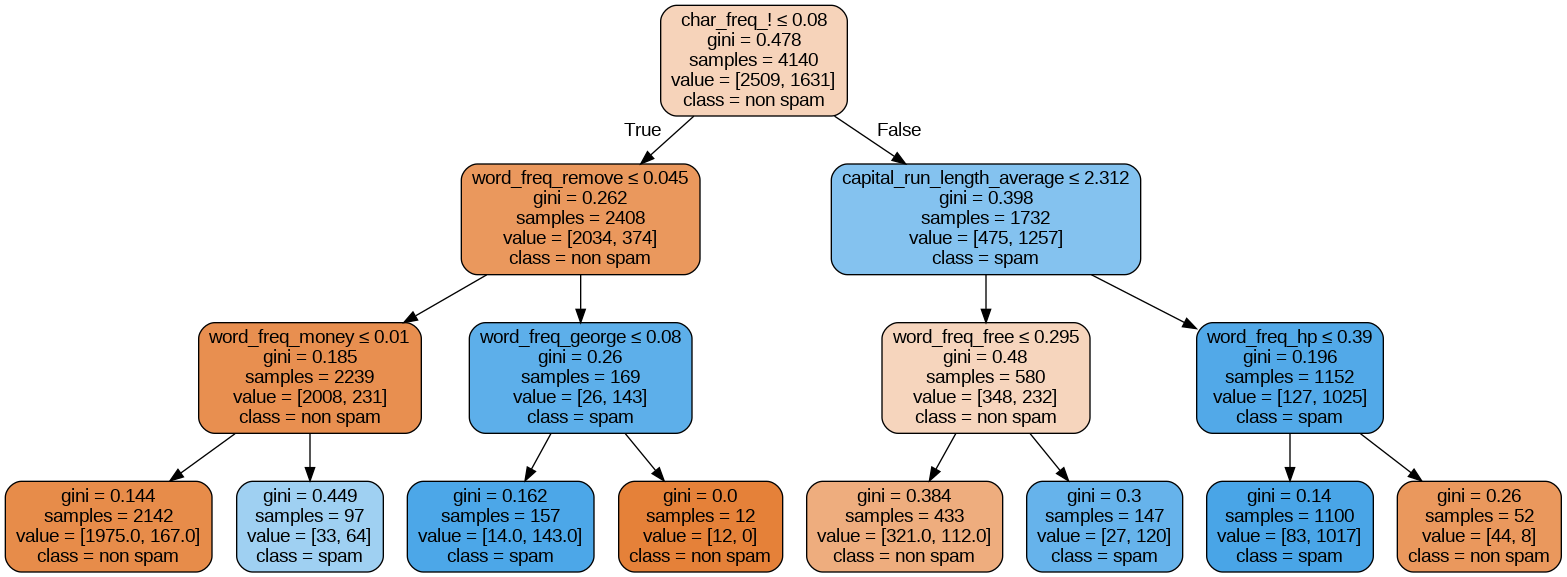

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

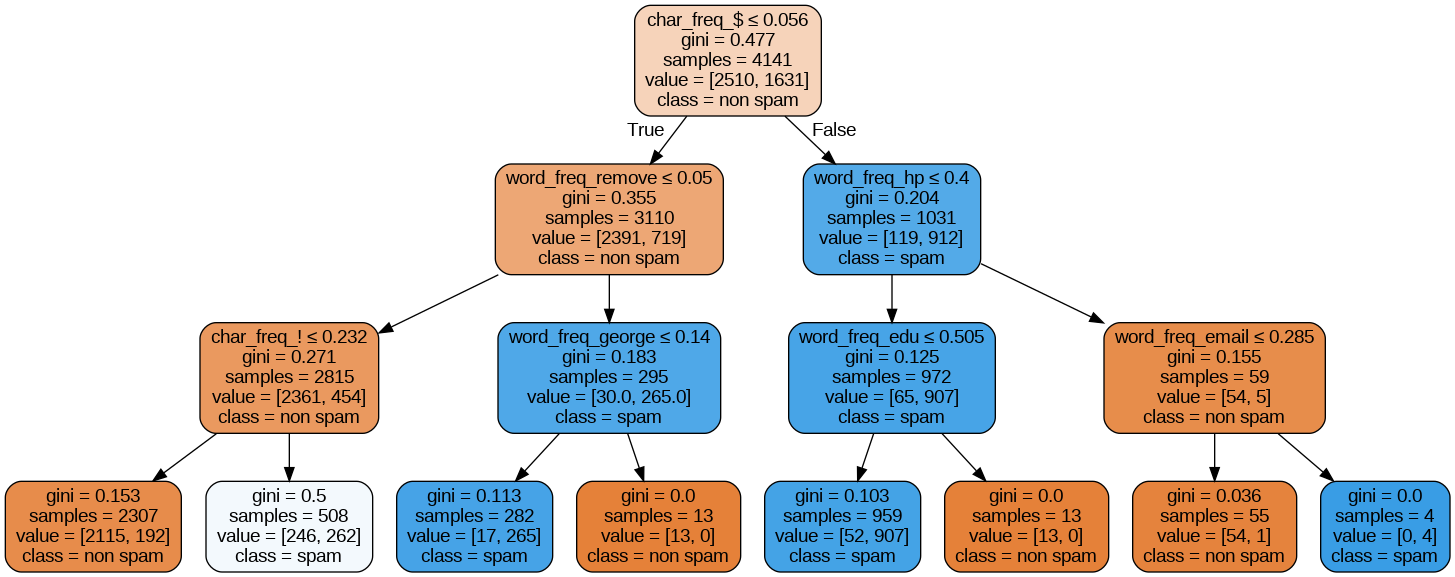

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

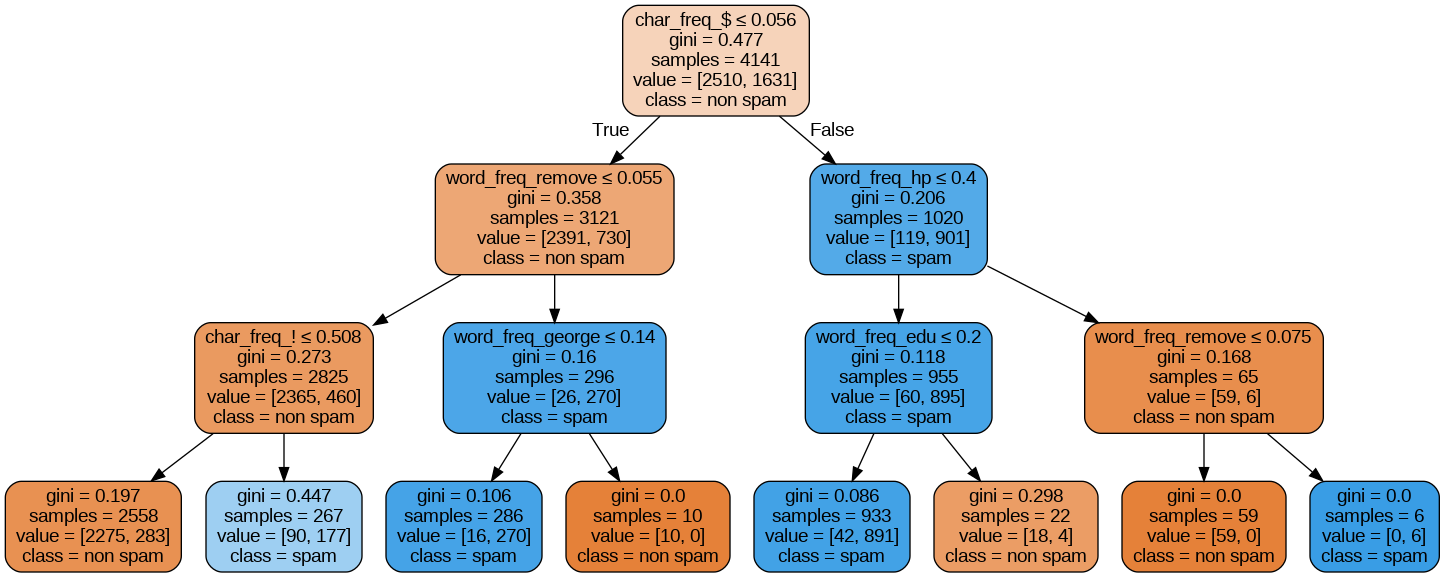

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

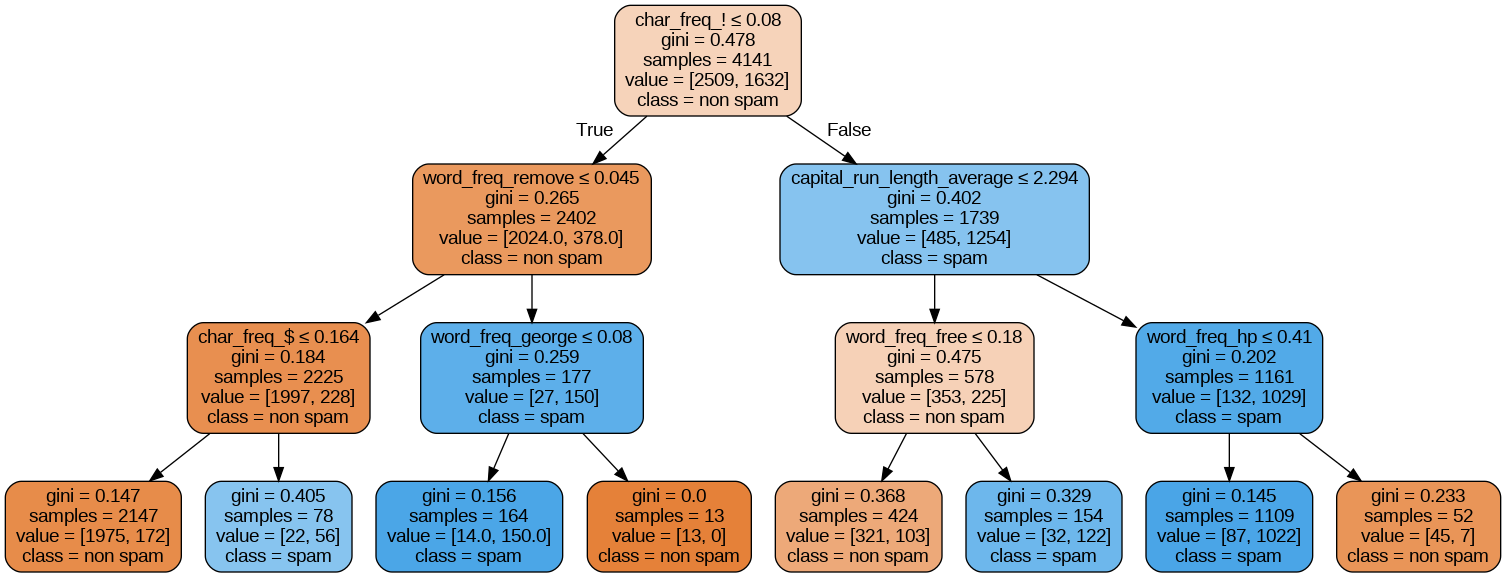

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

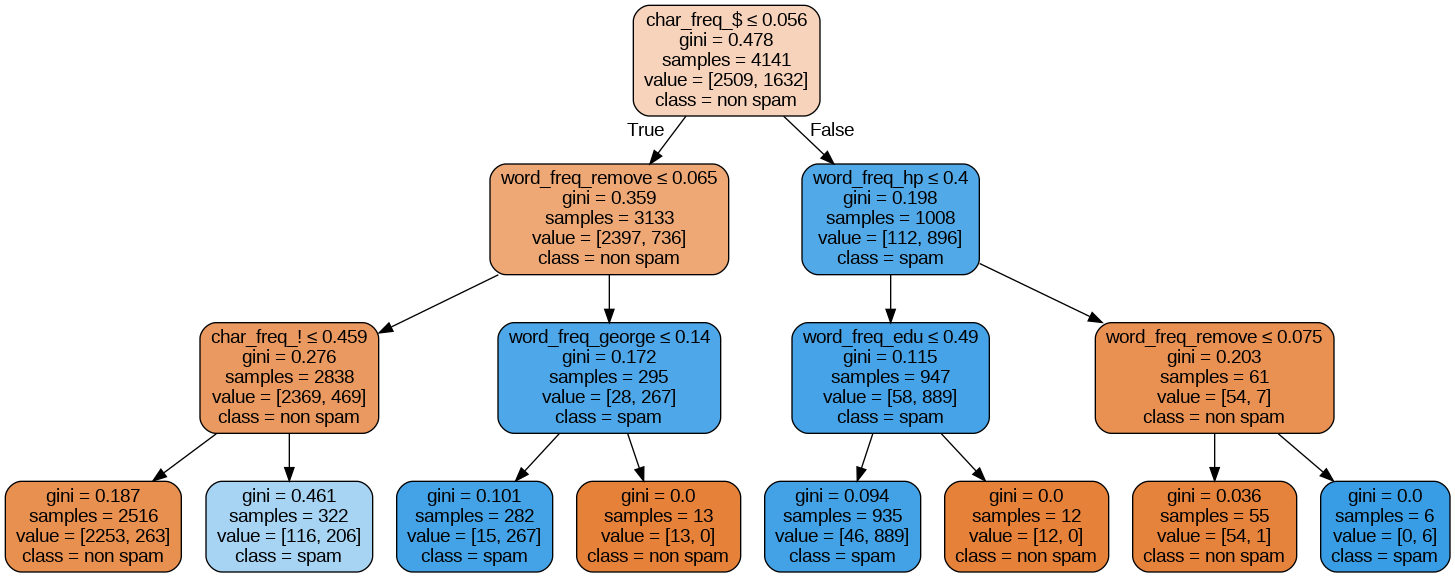

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

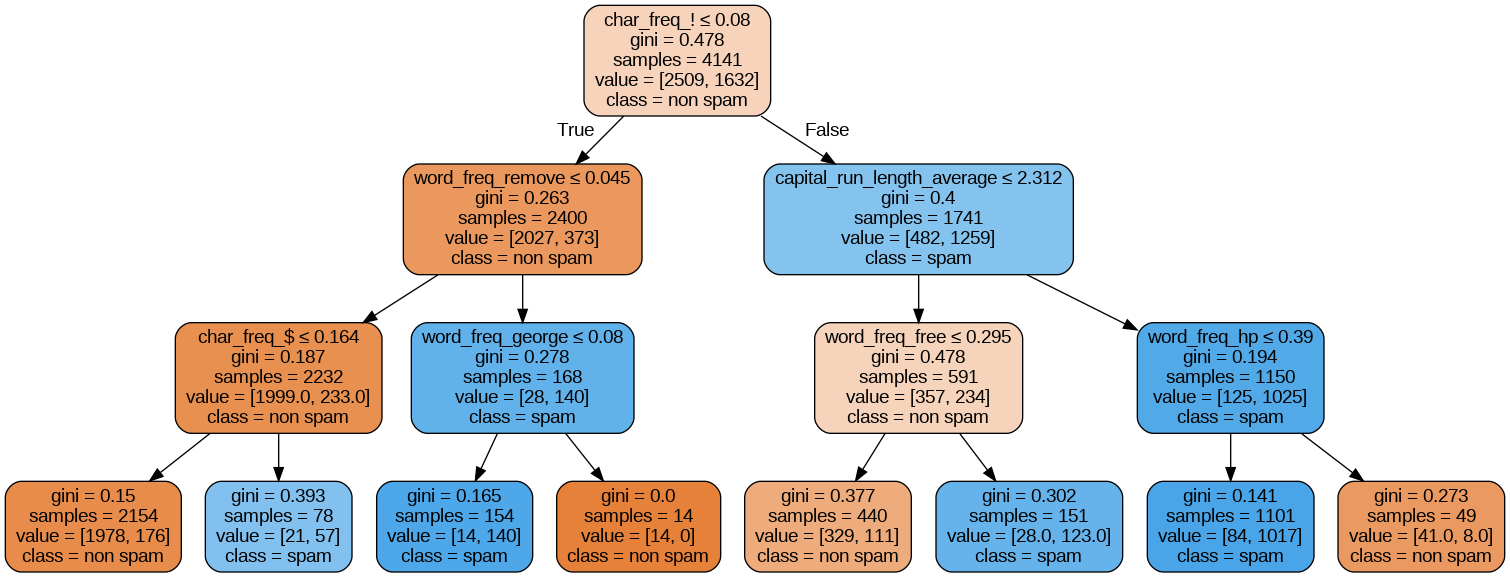

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

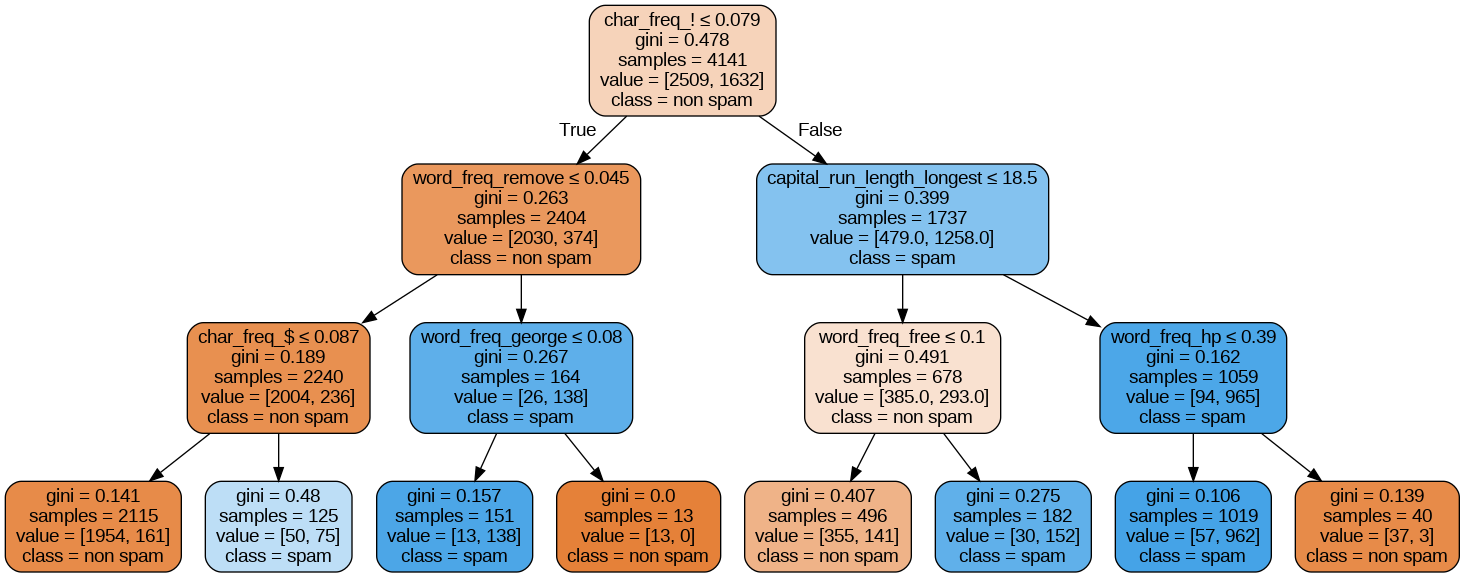

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

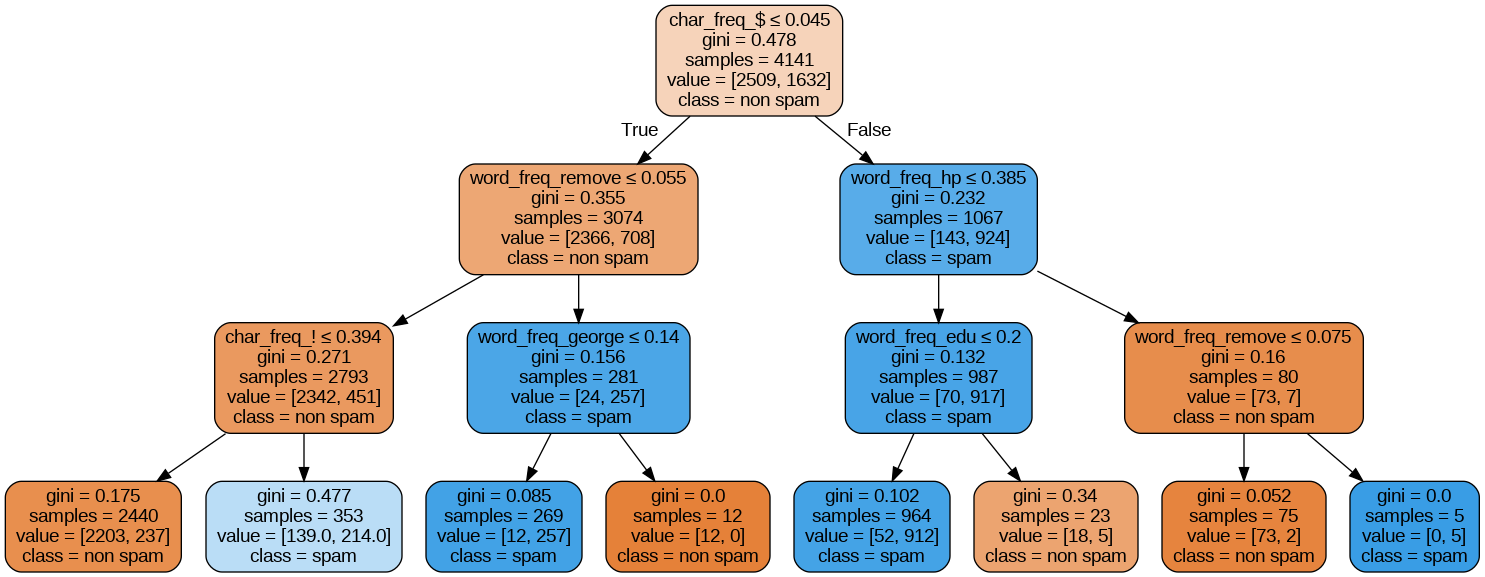

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

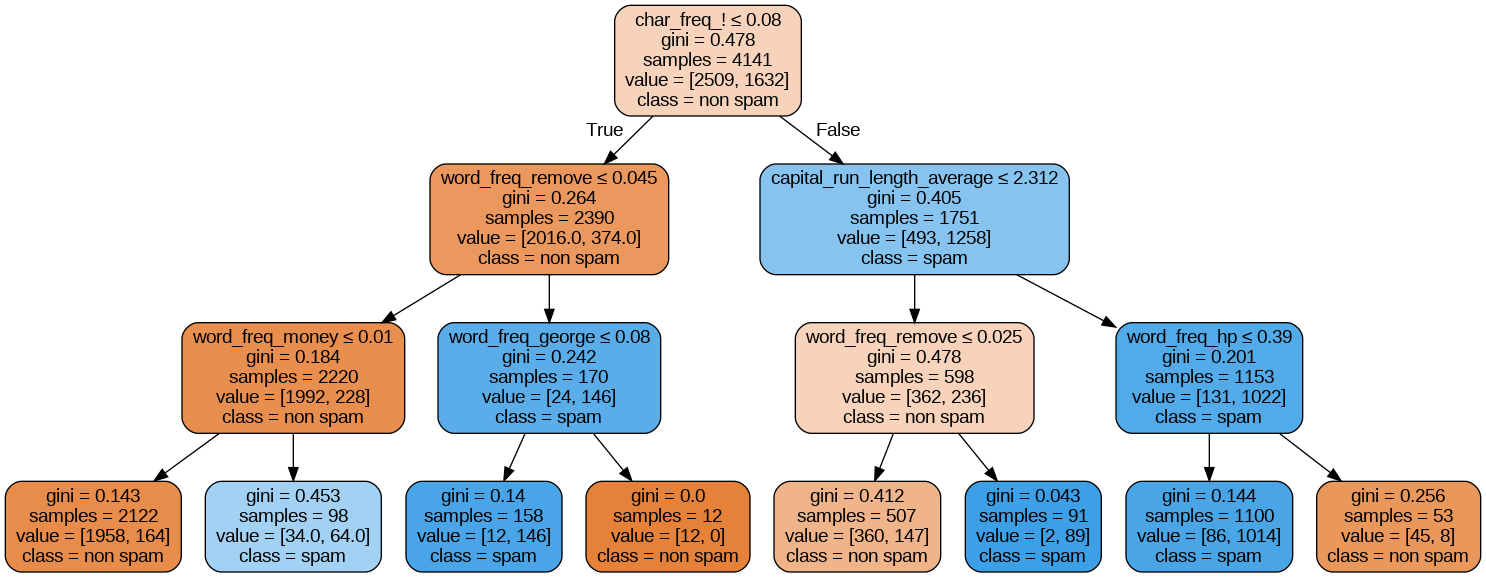

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

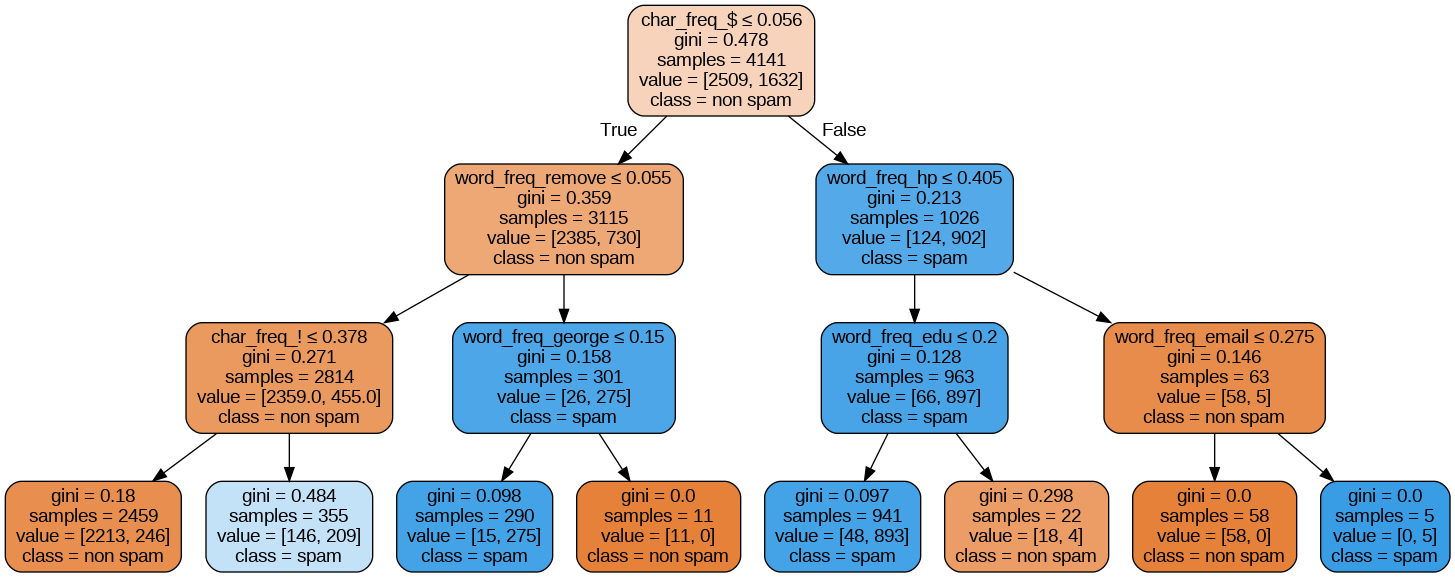

<IPython.core.display.Javascript object>

In [5]:
# (h) részfeladathoz kapcsolódó kód

from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from google.colab import widgets

tb = widgets.TabBar([str(i) for i in range(10)], location='top')
for i in range(10):
  with tb.output_to(i):
    dot_data = StringIO()
    export_graphviz(models[i], out_file=dot_data, feature_names=column_names, \
                        class_names=['non spam', 'spam'], filled=True, rounded=True, \
                        special_characters=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph[0].create_png()))

In [7]:
# (i)
best_model = DecisionTreeClassifier(max_depth=3)
best_model.fit(data, labels)
print("\nTrained model on all data.")
print(f"Best model accuracy: {max_accuracy:.4f}")


Trained model on all data.
Best model accuracy: 0.8848


**2. feladat: kiértékelési metrikák: Precision, Recall, F-measure**

Tanítson egy logisztikus regressziós modellet az előbbi spam-felismerési feladatra a megadott kód segítségével! A *predict_proba* metódust használva a logisztikus regresszió egy 0 és 1 közötti valószínűséget prediktál minden osztályra, amely azt adja meg, hogy mekkora eséllyel tartozik egy-egy példány az egyes osztályokba. Feltételezve, hogy 0.5 feletti valószínűség esetén a modell az adott e-mail-t spam-ként osztályozta, és azt, hogy a "spam" osztályt tekintjük a pozitív osztálynak,

(a) számolja ki az osztályozó precision-ét (azt, hogy a pozitívnak prediktált példányok mekkora része pozitív ténylegesen),

(b) recall-át (azt, hogy a ténylegesen pozitív példányok mekkora részét prediktálta a modell pozitívnak), és

(c) f-measure-ét (precision és recall harmónikus közepét)!

(d) Írjon egy függvényt, amely tetszőleges küszöbszám mellett kiszámolja a precision-t és recall-t.

(e) Az előbbi függvényt meghívva mentse le a precision és recall értékeket 0.1, 0.2, 0.3, 0.4, ... 0.9 küszöbszámok mellett egy *precisions* ill. *recalls* elnevezésű listába. A megadott kód segítségével ábrázolja a kapott precision és recall értékeket!

(f) A precision-recall görbe alatti terület használható a modell pontosságának mérésére. Ugyanakkor ez a mérék túlságosan optimista lehet(*), egy jobb eljárás a modell pontosságának mérésére az összes lehetséges recall szint melletti precision átlaga, amely egyben közelítése a precision-recall görbe alatti területnek. Számolja ki a modell pontosságát az sklearn.metrics csomagbeli average_precision_score függvényt használva! Ha szükséges, tanulmányozza az alábbi dokumentációt:

(*) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html


In [ ]:
from sklearn.linear_model import LogisticRegression

test_indices = np.array(range(0,len(data),5))
train_indices = [i for i in range(len(data)) if i not in test_indices]

data_train   = data[train_indices]
data_test    = data[test_indices]
labels_train = labels[train_indices]
labels_test  = labels[test_indices]

model = LogisticRegression()
model.fit(data_train, labels_train)

pred = model.predict_proba(data_test)

In [ ]:
...IDE JÖN A KÓD...

In [ ]:
# (e) részfeladathoz kapcsolódó kód precision és recall ábrázolására
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(precisions, recalls, linestyle='--', marker='o');

In [ ]:
...IDE JÖN A KÓD...

**3. feladat: precision, recall, f-measure 10-szeres keresztvalidáció mellett**

(a) Az előbbi kódokból kiindulva tanítson logisztikus regressziót spam felismerésre 10-szeres keresztvalidáció mellett. A keresztvalidáció minden fordulójában számolja ki a precision, recall és f-measure értékét 0.5-ös küszöbszám mellett, és mentse el ezeket *prec_lr*, *recall_lr* és *f_lr* listákba.

(b) Számolja ki a 10 fordulóban kapott precision, recall és f-measure átlagát! Számolja ki az átlagos precision és átlagos recall harmónikus közepét! Hasonlítsa össze az f-measure-k átlagával!

(c) Hogyan tudnánk precision-t, recall-t és f-measure-t számolni többosztályos osztályozási feladatoknál, ahol nem csak két osztály van?

In [ ]:
...IDE JÖN A KÓD...

In [ ]:
...IDE JÖN A KÓD...

In [ ]:
...IDE JÖN A KÓD...

**4. feladat: szignifikanciavizsgálat t-próbával**

(a) Módosítsa a 3-dik feladatban elkészített kódot úgy, hogy fordulónként lementi a helyesen osztályozott példányok arányát az *accuracies_lr* elnevezésű tömbbe. Számolja ki az átlagos accuracy-t.

(b) A scipy.stats csomagbeli ttest_rel függvényt használva döntse el, hogy van-e szignifikáns különbség a két osztályozó teljesítménye között!

In [ ]:
...IDE JÖN A KÓD...

In [ ]:
...IDE JÖN A KÓD...